C:\Users\thinkbook\AppData\Local\Temp\ipykernel_28648\3373809178.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="A Value", y="Best Value", data=plot_df, inner="quartile", palette="Set2")


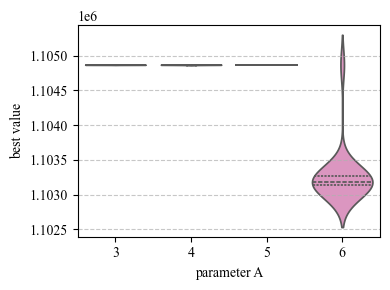

Generated sensitivity analysis plot for skp322: skp322_violin_best.png


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_28648\3373809178.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="A Value", y="Best Value", data=plot_df, inner="quartile", palette="Set2")


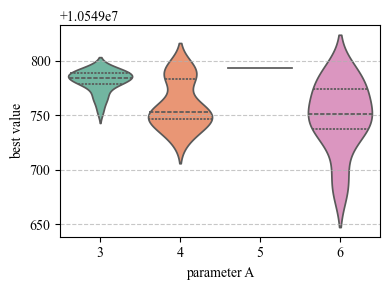

Generated sensitivity analysis plot for skp332: skp332_violin_best.png


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_28648\3373809178.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="A Value", y="Best Value", data=plot_df, inner="quartile", palette="Set2")


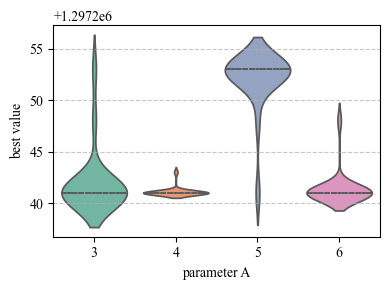

Generated sensitivity analysis plot for ukp322: ukp322_violin_best.png


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_28648\3373809178.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="A Value", y="Best Value", data=plot_df, inner="quartile", palette="Set2")


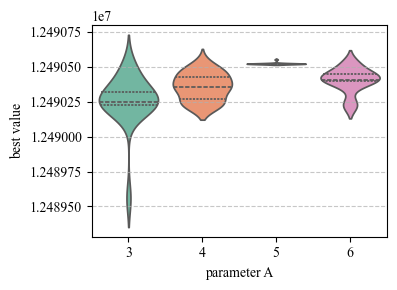

Generated sensitivity analysis plot for ukp332: ukp332_violin_best.png


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_28648\3373809178.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="A Value", y="Best Value", data=plot_df, inner="quartile", palette="Set2")


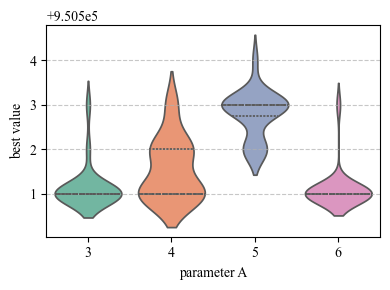

Generated sensitivity analysis plot for wkp322: wkp322_violin_best.png


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_28648\3373809178.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="A Value", y="Best Value", data=plot_df, inner="quartile", palette="Set2")


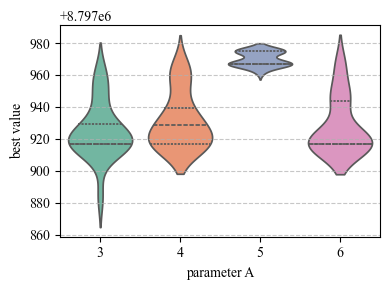

Generated sensitivity analysis plot for wkp332: wkp332_violin_best.png
All instances processed successfully!


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = 'Times New Roman'
# 删除中文字体设置，使用默认英文兼容字体
# 1. Define the list of instances and parameter A values
instances = ["skp322", "skp332", "ukp322", "ukp332", "wkp322", "wkp332"]
A_values = [3, 4, 5, 6]  # Values of transfer function parameter A
csv_suffix = "_best.csv"  # Suffix of CSV files
png_suffix = "_best.png"  # Suffix of output PNG files

# 2. Process each instance and plot violin plots
for instance in instances:
    # Read CSV file (4 rows × 20 columns: rows = A values, columns = 20 runs of best values)
    csv_path = f"{instance}{csv_suffix}"
    try:
        df = pd.read_csv(csv_path, header=None, index_col=None)
    except FileNotFoundError:
        print(f"Warning: File {csv_path} not found, skipping this instance")
        continue
    
    # Reshape data: convert wide-format (4×20) to long-format for seaborn
    data_list = []
    for a_idx, a in enumerate(A_values):
        # Get 20 runs of data for current A value
        a_data = df.iloc[a_idx, :].values
        for value in a_data:
            data_list.append({"A Value": a, "Best Value": value})
    
    # Convert to DataFrame
    plot_df = pd.DataFrame(data_list)
    
    # 3. Plot violin plot
    plt.figure(figsize=(4, 3))
    # Violin plot with quartile lines inside
    sns.violinplot(x="A Value", y="Best Value", data=plot_df, inner="quartile", palette="Set2")
    # Add scatter points to show raw data
    # sns.stripplot(x="A Value", y="Best Value", data=plot_df, color="black", size=2, alpha=0.5)
    
    # Set plot title and labels (all in English)
    # plt.title(f"{instance} Instance", 
    #           fontsize=14, pad=20)
    plt.xlabel("parameter A", fontsize=10)
    plt.ylabel("best value", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    # 4. Save plot as PNG
    png_path = f"{instance}_violin{png_suffix}"
    plt.tight_layout()  # Adjust layout to prevent label cutting
    plt.savefig(png_path, dpi=1000, format="png")
    plt.show()
    plt.close()  # Close figure to free memory
    print(f"Generated sensitivity analysis plot for {instance}: {png_path}")

print("All instances processed successfully!")